# Exploratory Analyses of Predictors

In [1]:
### Initialize seed for reproducibility
import numpy as np
np.random.seed(0)
import math

### Data Wrangling and Plots
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
import seaborn as sns

from sklearn.model_selection import train_test_split

## Load datasets

In [2]:
#data = pd.read_csv("./tm_predictors/tm_dataset_nsp.csv")
data = pd.read_csv("./tm_predictors/tm_dataset_af2.csv")
#data = pd.read_csv("./tm_predictors/tm_dataset_pchars_maestro.csv")
#data = pd.read_csv("./tm_predictors/tm_dataset_ESM_650M.csv", header=None)
#data = pd.read_csv("./tm_predictors/tm_dataset_ESM_3B.csv", header=None)
#data = pd.read_csv("./tm_predictors/tm_dataset_ESM_15B.csv", header=None)
data.head()

y = pd.read_excel("sdab_data.xlsx")
y = y.tm
x = data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# check assignments - y should be Tms only
print(x)
print(y)

     fr1.pLDDT  cdr1.pLDDT  fr2.pLDDT  cdr2.pLDDT  fr3.pLDDT  cdr3.pLDDT  \
0    97.475909   96.821538  95.884615   96.975000  98.323421   76.051429   
1    96.706364   94.692308  96.510000   94.944000  97.970526   64.882143   
2    97.194091   96.284615  97.346923   96.206000  97.610263   97.532105   
3    96.340909   95.048462  96.642308   94.969000  96.982368   96.404211   
4    95.465455   86.233636  93.625385   84.005455  95.632105   77.029524   
..         ...         ...        ...         ...        ...         ...   
562  94.110455   80.072308  93.802308   90.388000  95.187568   87.695882   
563  92.017273   88.635833  95.321538   85.972857  93.052105   91.192000   
564  93.287273   80.556667  95.452308   92.018571  95.777632   91.175333   
565  95.014545   86.904615  95.586154   90.269000  96.264474   83.921176   
566  93.682727   75.377500  95.038462   87.181000  95.228684   66.904000   

     fr4.pLDDT  
0    95.653636  
1    95.596364  
2    96.727273  
3    95.750000  
4 

### Plot pLDDT scores per region (only with AF2 dataset)

C:\Users\jalvarez\AppData\Roaming\Python\Python39\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


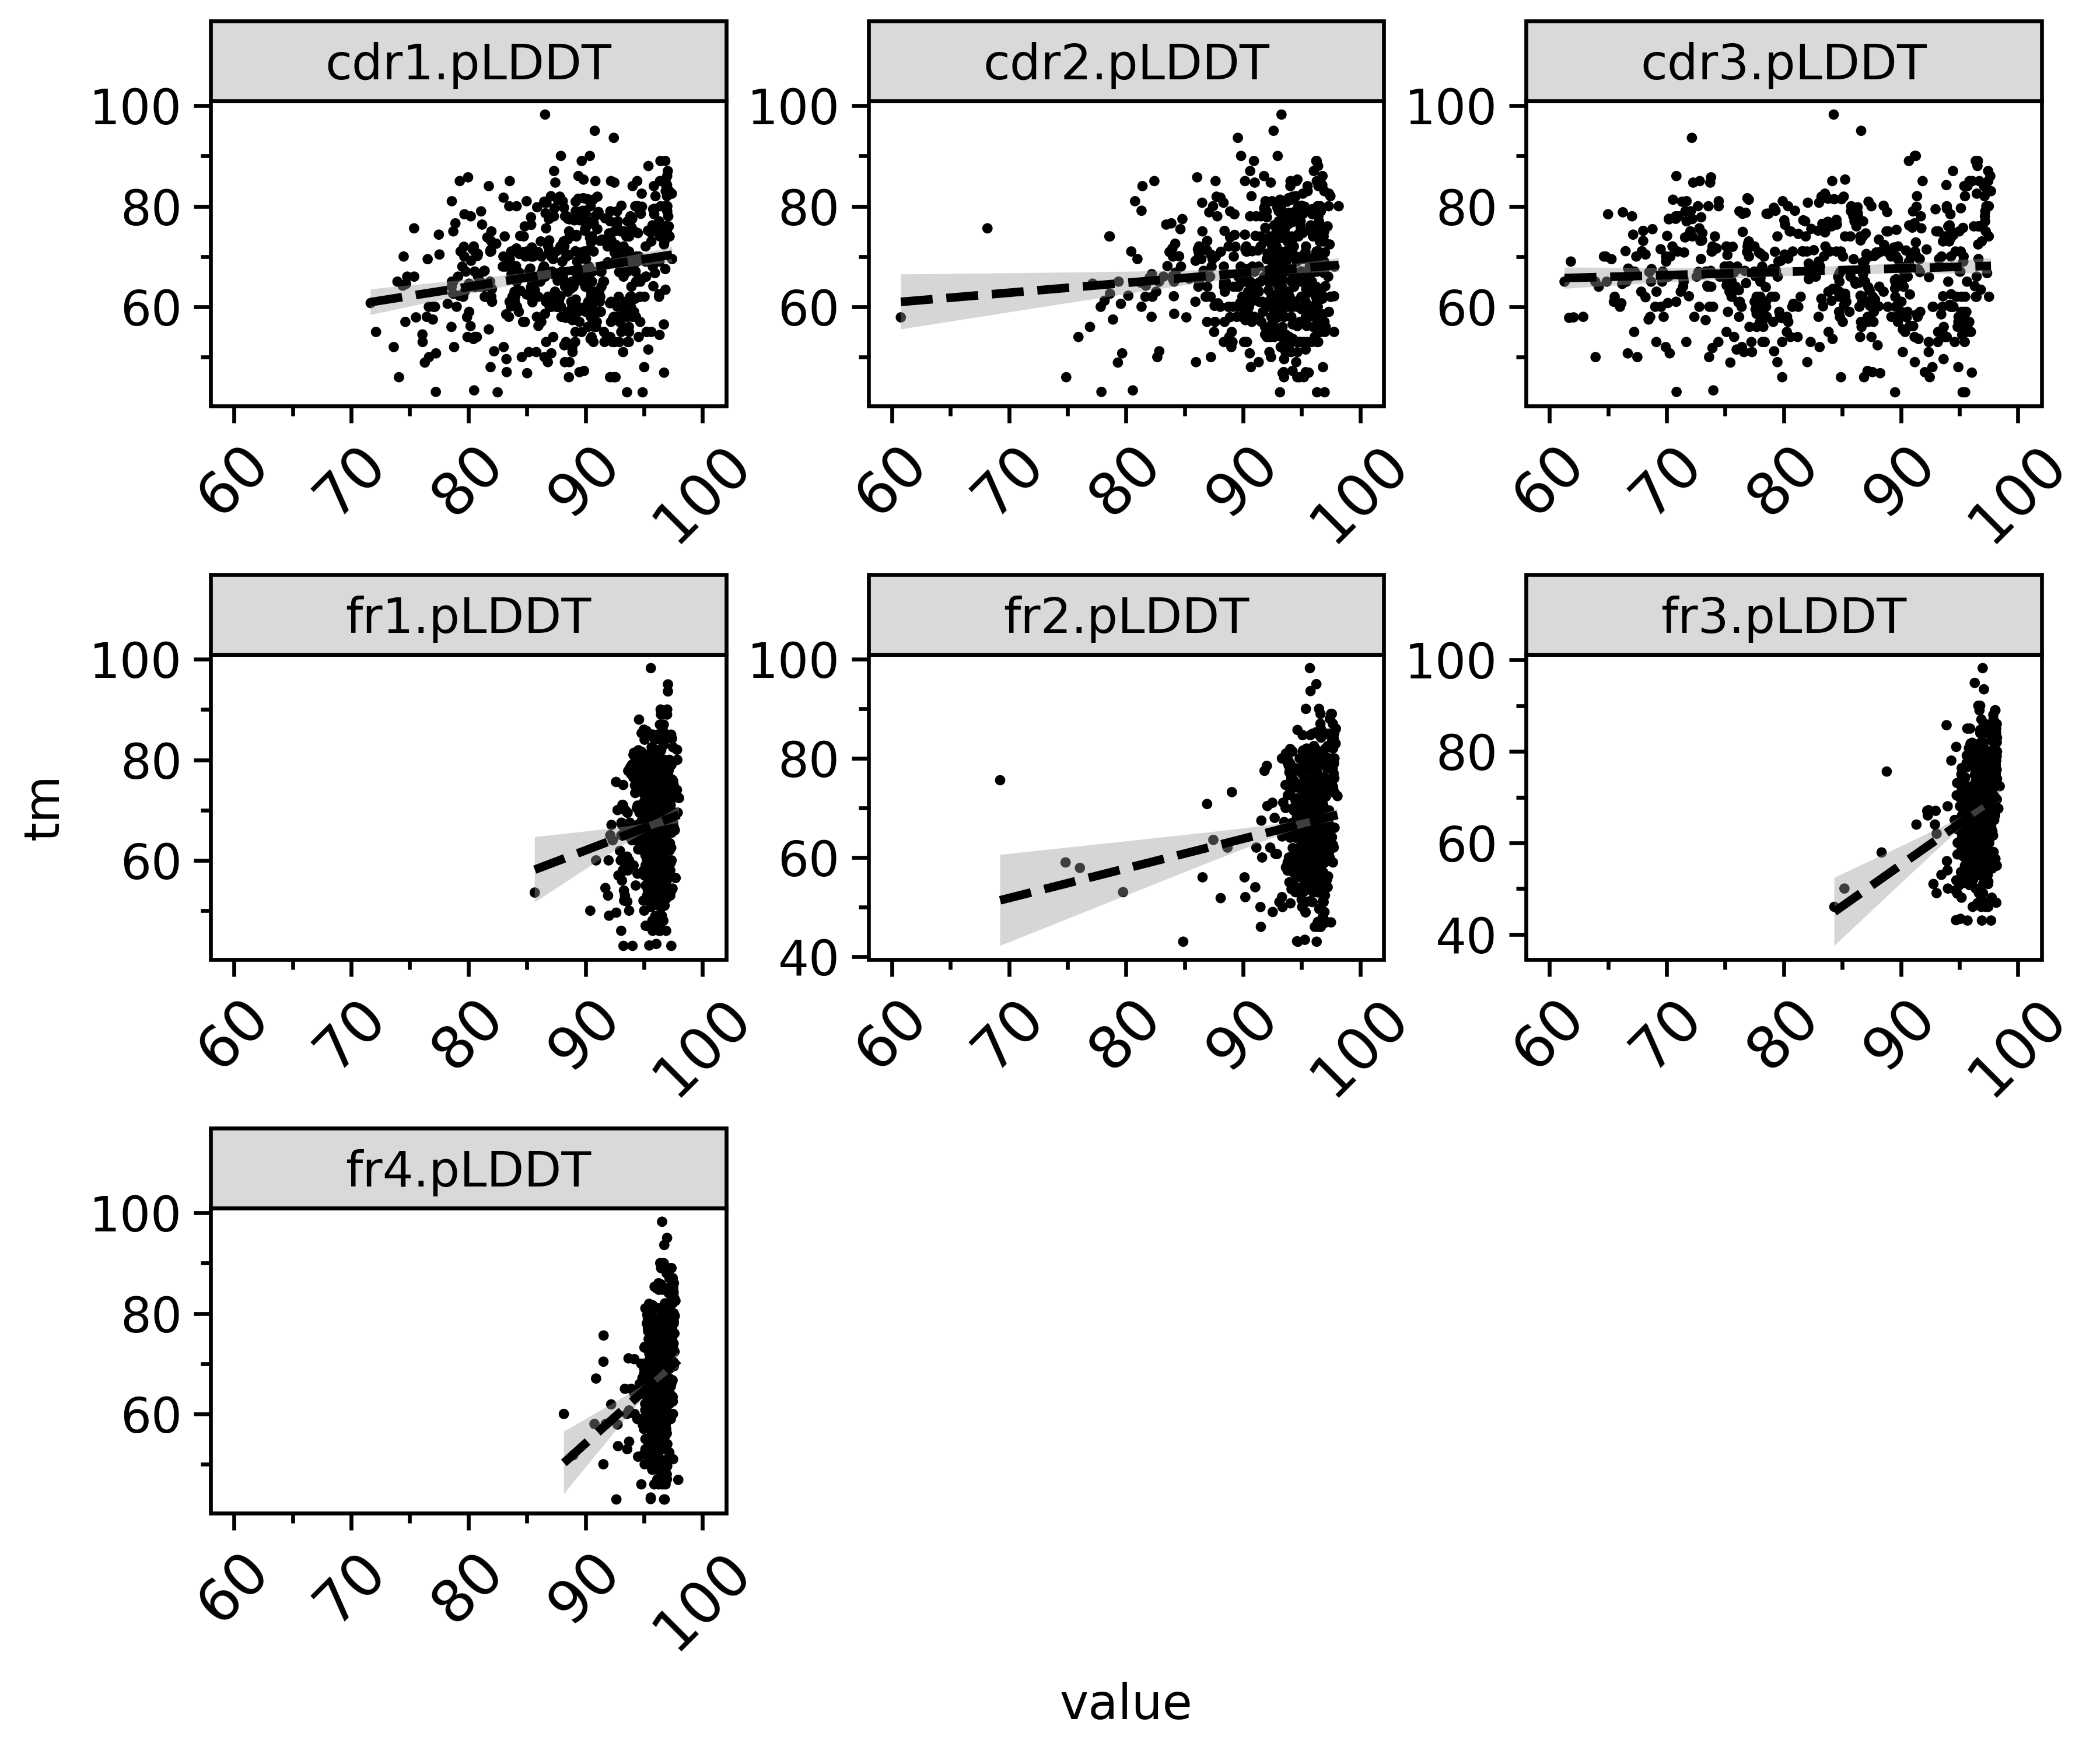

In [4]:
from plotnine import *
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

dataset = pd.concat([y,x], ignore_index=False, sort=False, axis=1)
df_facet = pd.melt(dataset, id_vars='tm', var_name="variable", value_name="value")

(
    ggplot(df_facet, aes(x = "value", y = "tm"))
    + facet_wrap("variable", scales = "free")
    + geom_point(size=0.2, color="black")
    + stat_smooth(level=0.99, n=567, linetype="dashed")
    + theme_matplotlib()
    + theme(figure_size=(6, 5), axis_text_x = element_text(size=12, angle=45))
    + scale_x_continuous(limits=[60,100])
)

In [7]:
dataset.corr()

tm  fr1.pLDDT  cdr1.pLDDT  fr2.pLDDT  cdr2.pLDDT  fr3.pLDDT  \
tm          1.000000   0.113765    0.205078   0.140310    0.092832   0.239774   
fr1.pLDDT   0.113765   1.000000    0.460093   0.303986    0.178807   0.487700   
cdr1.pLDDT  0.205078   0.460093    1.000000   0.251574    0.570268   0.640369   
fr2.pLDDT   0.140310   0.303986    0.251574   1.000000    0.333861   0.468350   
cdr2.pLDDT  0.092832   0.178807    0.570268   0.333861    1.000000   0.660132   
fr3.pLDDT   0.239774   0.487700    0.640369   0.468350    0.660132   1.000000   
cdr3.pLDDT  0.078179   0.269993    0.451344   0.336961    0.448729   0.398920   
fr4.pLDDT   0.219478   0.613918    0.359146   0.522228    0.239339   0.448458   

            cdr3.pLDDT  fr4.pLDDT  
tm            0.078179   0.219478  
fr1.pLDDT     0.269993   0.613918  
cdr1.pLDDT    0.451344   0.359146  
fr2.pLDDT     0.336961   0.522228  
cdr2.pLDDT    0.448729   0.239339  
fr3.pLDDT     0.398920   0.448458  
cdr3.pLDDT    1.000000   0.454123  
fr4.pLDDT     0.454123   1.000000

## Cross-Correlations

In [5]:
data1 = pd.read_csv("./tm_predictors/tm_dataset_nsp.csv")
data2 = pd.read_csv("./tm_predictors/tm_dataset_af2.csv")
data3 = pd.read_csv("./tm_predictors/tm_dataset_pchars_maestro.csv")
data_all = pd.concat([data1, data2, data3], ignore_index=False, sort=False, axis=1)


In [4]:
print(data_all.corr())

                     length      q3_H      q3_E      q3_C      q8_G      q8_H  \
length             1.000000 -0.007282 -0.637293  0.579269 -0.129394  0.447738   
q3_H              -0.007282  1.000000  0.042826 -0.428227  0.947997  0.599369   
q3_E              -0.637293  0.042826  1.000000 -0.921181  0.189891 -0.430440   
q3_C               0.579269 -0.428227 -0.921181  1.000000 -0.540992  0.155885   
q8_G              -0.129394  0.947997  0.189891 -0.540992  1.000000  0.367044   
q8_H               0.447738  0.599369 -0.430440  0.155885  0.367044  1.000000   
q8_I               0.530465  0.367620 -0.405721  0.223791  0.150201  0.874993   
q8_B               0.456059  0.210176 -0.491641  0.362829  0.042462  0.611292   
q8_E              -0.621482  0.017892  0.996501 -0.908305  0.168182 -0.453101   
q8_S              -0.309911 -0.329699 -0.144952  0.259524 -0.382228 -0.114643   
q8_T              -0.330214 -0.036873  0.203624 -0.169816 -0.010997 -0.085321   
q8_C               0.696681 

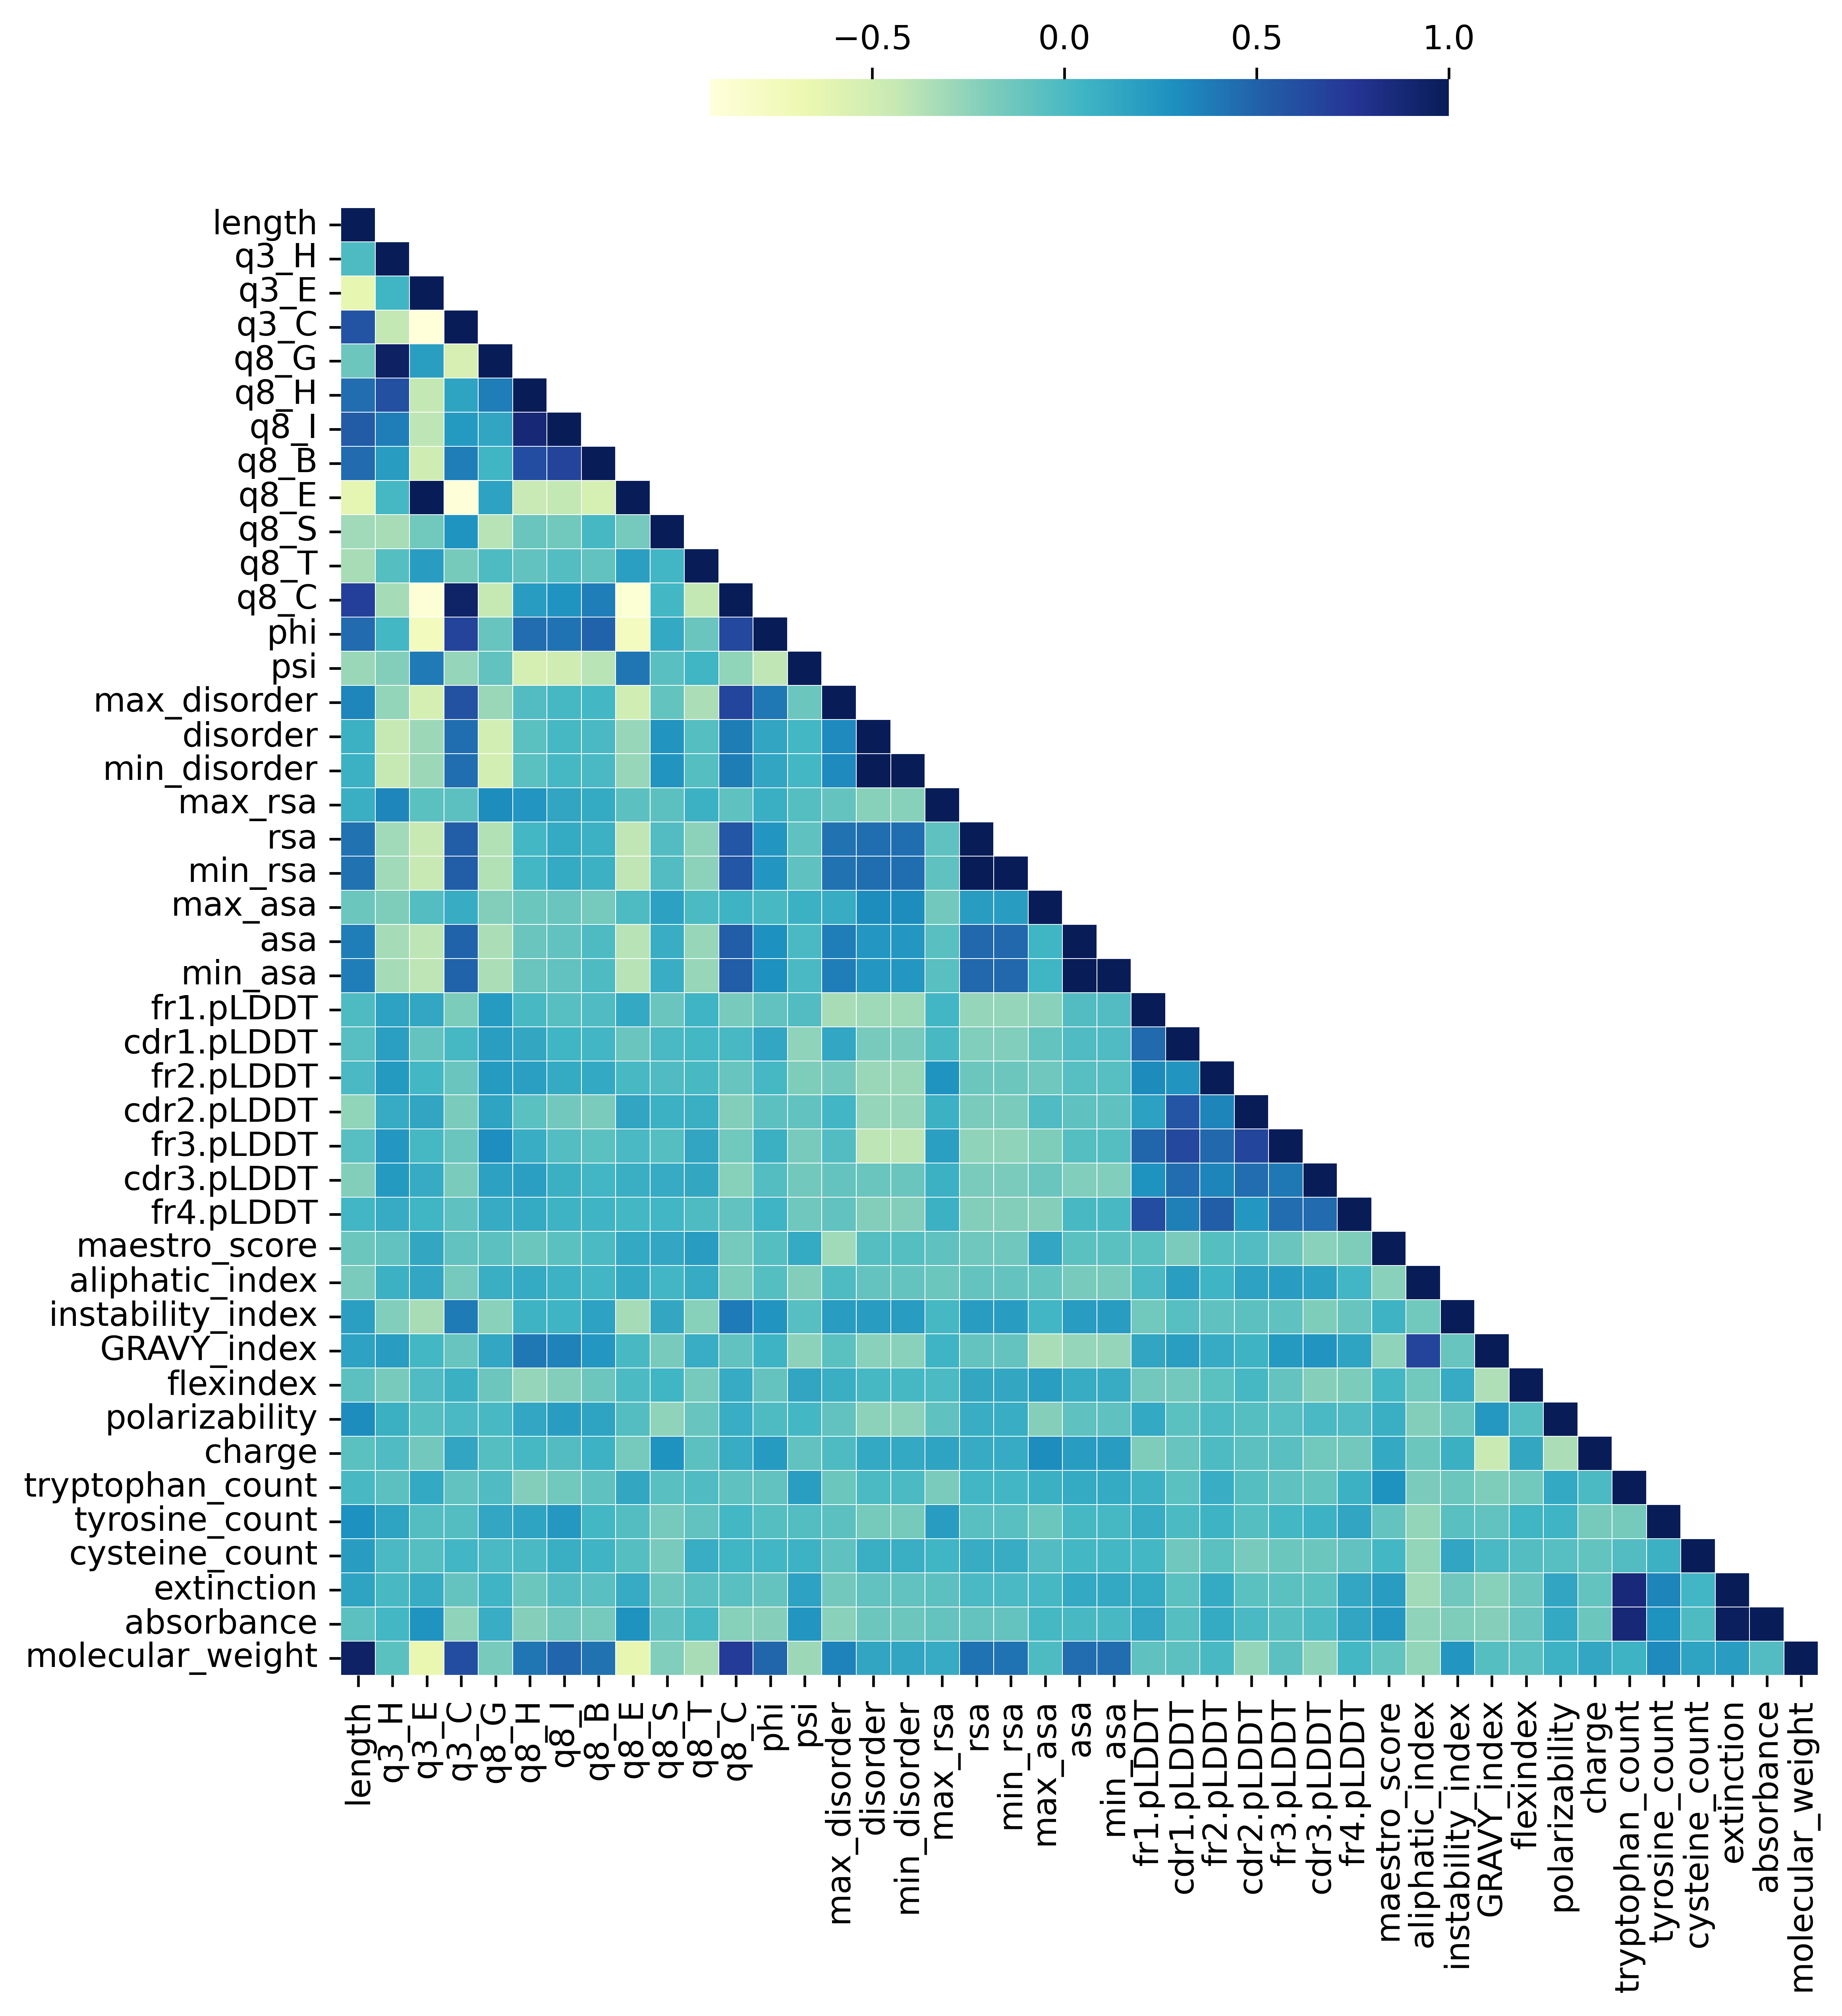

In [8]:
#dataset = pd.concat([y,x], ignore_index=False, sort=False, axis=1)
df_corr_matrix = data_all.corr()
mask = np.triu(np.ones_like(data_all.corr())) 
np.fill_diagonal(mask, False)
fig, ax = plt.subplots(figsize=(8,10))  
cross_corr = sns.heatmap(df_corr_matrix, cmap="YlGnBu", annot=False, mask=mask, 
                         xticklabels=True, yticklabels=True, linewidths=0.2, ax=ax,
                         cbar_kws = dict(use_gridspec=False, location="top", shrink=.5))
plt.show()

## SHAP for explainability

In [4]:
import shap

#data = pd.read_csv("./tm_predictors/tm_dataset_nsp.csv")
#data = pd.read_csv("./tm_predictors/tm_dataset_af2_nbb.csv")
#data = pd.read_csv("./tm_predictors/tm_dataset_af2.csv")
#data = pd.read_csv("./tm_predictors/tm_dataset_nbb.csv")
data = pd.read_csv("./tm_predictors/tm_dataset_pchars_maestro.csv")
#data = pd.read_csv("./tm_predictors/tm_dataset_ESM_650M.csv", header=None)
#data = pd.read_csv("./tm_predictors/tm_dataset_ESM_3B.csv", header=None)
#data = pd.read_csv("./tm_predictors/tm_dataset_ESM_15B.csv", header=None)
data.head()

y = pd.read_excel("sdab_data.xlsx")
y = y.tm
x = data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# check assignments - y should be Tms only
print(x)
print(y)

     maestro_score  aliphatic_index  instability_index  GRAVY_index  \
0         -2.06565        63.719008          33.592562    -0.358678   
1         -2.40461        57.310345          38.935862    -0.349655   
2         -2.00360        53.412698          28.749206    -0.602381   
3         -2.39683        48.866667          34.689333    -0.554667   
4         -1.81655        69.212598          31.629134    -0.184252   
..             ...              ...                ...          ...   
562       -2.39889        62.682927          30.290244    -0.432520   
563       -1.71309        52.881356          43.250000    -0.630508   
564       -1.80954        56.186441          45.015254    -0.591525   
565       -2.01848        63.870968          28.375806    -0.326613   
566       -1.13930        62.066116          39.228926    -0.444628   

     flexindex  polarizability  positive_charge  tryptophan_count  \
0     0.178194        0.429752         0.090909                 3   
1     0.1

In [5]:
import keras
model = keras.models.load_model("./saved_ANNmodels_1500epoch/pchars_maestro.keras")
#model = keras.models.load_model("./saved_ANNmodels_1500epoch/af2.keras")
#model = keras.models.load_model("./saved_ANNmodels_1500epoch/nsp3.keras")
#model = keras.models.load_model("./saved_ANNmodels_1500epoch/ESM_650M.keras")
#model = keras.models.load_model("./saved_ANNmodels_1500epoch/ESM_3B.keras")
#model = keras.models.load_model("./saved_ANNmodels_1500epoch/ESM_15B.keras")
model

In [6]:
x_train.iloc[40:50,:]


maestro_score  aliphatic_index  instability_index  GRAVY_index  \
407       -1.64254        52.622951          32.103279    -0.570492   
163       -2.38917        60.542636          53.281395    -0.275194   
290       -2.12675        76.260870          28.727826    -0.335652   
493       -1.49608        58.225806          28.259677    -0.496774   
149       -1.24376        61.016949          43.861017    -0.563559   
124       -1.95161        71.735537          33.132231    -0.262810   
447       -1.98899        70.909091          27.516529    -0.397521   
182       -2.14764        75.495496          20.996396    -0.363964   
431       -2.04095        67.680000          28.100800    -0.284000   
199       -1.58804        64.488189          42.512598    -0.306299   

     flexindex  polarizability  positive_charge  tryptophan_count  \
407   0.061885        0.426230         0.106557                 4   
163   0.146809        0.457364         0.062016                 2   
290   0.132968        0.417391         0.104348                 2   
493   0.116093        0.435484         0.096774                 3   
149   0.166794        0.406780         0.093220                 3   
124   0.093164        0.454545         0.074380                 3   
447   0.127720        0.421488         0.090909                 3   
182   0.052716        0.387387         0.108108                 2   
431   0.193664        0.408000         0.080000                 2   
199   0.116297        0.377953         0.094488                 4   

     tyrosine_count  cysteine_count  extinction  absorbance  molecular_weight  
407               6               4       31440    2.331157       13486.86784  
163               7               2       21680    1.587571       13656.07964  
290               5               2       18700    1.510519       12379.84904  
493               9               2       30160    2.228310       13534.92164  
149               8               2       28670    2.201092       13025.35414  
124               9               2       30160    2.331417       12936.33764  
447               6               2       25690    1.934822       13277.70794  
182               6               2       20190    1.673497       12064.56014  
431               9               2       24660    1.837434       13420.89014  
199               5               5       30075    2.160622       13919.60264

In [7]:
x_test.iloc[0,:]

maestro_score           -2.431620
aliphatic_index         53.859649
instability_index       41.533333
GRAVY_index             -0.666667
flexindex                0.243613
polarizability           0.377193
positive_charge          0.105263
tryptophan_count         2.000000
tyrosine_count           9.000000
cysteine_count           2.000000
extinction           24660.000000
absorbance               1.937287
molecular_weight     12729.140940
Name: 540, dtype: float64

In [79]:
X,Y = shap.datasets.diabetes()
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
from sklearn import linear_model
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, Y_train)
shap.initjs()

In [80]:
ex = shap.KernelExplainer(lin_regr.predict, X_train.iloc[40:50,:])
shap_values = ex.shap_values(X_test.iloc[0,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0,:])

In [91]:
shap_values = ex.shap_values(X_test.iloc[0:4,:])
#shap.summary_plot(shap_values, X_test)
shap_values

  0%|          | 0/4 [00:00<?, ?it/s]

array([[ -0.38741296, -13.90735389,  60.47323966,  26.81851548,
         40.39486421, -17.62474764,  -0.35535279,  -4.77673831,
         -2.43563425,   1.49720521],
       [  0.77482592,   9.27156926,  35.6046055 ,  21.56018924,
        -15.22786078,   0.54823524,  -0.17312059,   1.50844368,
         46.21702682,   0.07129549],
       [ -1.03310122, -13.90735389,   6.49010696,  18.4051935 ,
         44.95410397, -15.79729685,  -0.71981718,  -4.77673831,
        -18.40197703,   0.07129549],
       [  0.77482592,   9.27156926, -11.70645462,  -6.83477244,
         27.6289929 ,  -7.47224324,  -0.17312059,  -4.77673831,
        -33.2878906 ,  -1.88933039]])

In [86]:
X_test.iloc[0,:]

age    0.019913
sex    0.050680
bmi    0.104809
bp     0.070072
s1    -0.035968
s2    -0.026679
s3    -0.024993
s4    -0.002592
s5     0.003709
s6     0.040343
Name: 362, dtype: float64

In [87]:
x_test.iloc[0,:]

maestro_score           -2.431620
aliphatic_index         53.859649
instability_index       41.533333
GRAVY_index             -0.666667
flexindex                0.243613
polarizability           0.377193
positive_charge          0.105263
tryptophan_count         2.000000
tyrosine_count           9.000000
cysteine_count           2.000000
extinction           24660.000000
absorbance               1.937287
molecular_weight     12729.140940
Name: 540, dtype: float64

1/1 [==============================] - 0s 14ms/step


  0%|          | 0/3 [00:00<?, ?it/s]

649/649 [==============================] - 0s 645us/step


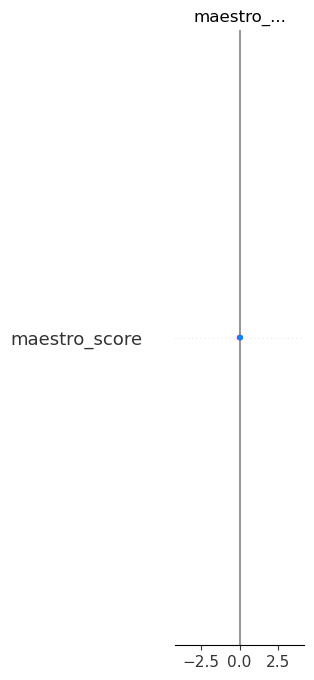

In [9]:
explainer = shap.KernelExplainer(model.predict, x_train.iloc[10:20,:])
shap_values = explainer.shap_values(x_test.iloc[0:3,:])
#shap_values = explainer.shap_values(x_test)
shap_values
#shap.force_plot(explainer.expected_value, shap_values, x_test.iloc[0:10,:])
shap.summary_plot(shap_values, x_test.iloc[0:3,:])